In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
pd.set_option('display.max_columns', None) # Display all columns

In [66]:
# Import and load the data set

effective_terrorism_tactics_df = pd.read_csv(r"C:\Users\shric\Desktop\Dai\assignments\midterm\effective_terrorism_tactics_exploration\data\globalterrorismdb_0522dist.csv")

# Ensure the data loaded correctly

effective_terrorism_tactics_df.head()

C:\Users\shric\AppData\Local\Temp\ipykernel_1932\1210854314.py:3: DtypeWarning:

Columns (4,31,33,54,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.



,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,National,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,Na

In [67]:
# View dataset information

effective_terrorism_tactics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209706 entries, 0 to 209705
Columns: 135 entries, eventid to related
dtypes: float64(54), int64(23), object(58)
memory usage: 216.0+ MB


In [68]:
# View dataset description

effective_terrorism_tactics_df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,2.097060e+05,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,205015.000000,205014.000000,209705.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,35249.000000,209705.000000,209706.000000,209706.000000,209706.000000,8434.000000,658.000000,209706.000000,197867.000000,207692.000000,14535.000000,14003.000000,14211.000000,1629.000000,1539.000000,1600.000000,209326.000000,2538.000000,410.000000,209706.000000,138613.000000,140233.000000,143613.000000,24696.000000,2476.000000,732.000000,409.000000,140.000000,4954.000000,209706.000000,183765.000000,16402.000000,14292.000000,2371.000000,2132.000000,73.000000,70.000000,197179.000000,145269.000000,141547.000000,189770.000000,145009.000000,138800.000000,209706.000000,73464.000000,4.837500e+04,209528.000000,16667.000000,16612.000000,4985.000000,10301.000000,80466.000000,1.533000e+03,7.340000e+02,9.510000e+02,725.000000,14091.000000,13494.000000,209706.000000,209706.000000,209706.000000,209706.000000
mean,2.004867e+11,2004.800993,6.455285,15.527930,0.051525,130.291351,7.279854,23.358696,30.416738,1.468387,0.068854,0.988265,0.993291,0.866246,-0.423593,1.293001,0.145900,0.883628,0.035469,3.351311,3.956011,5.705167,8.484078,47.163034,127.079035,10.050705,54.641720,126.196749,10.171885,55.948668,132.108125,0.075949,0.258077,0.185366,0.003929,-68.819613,-1.341261,0.079095,7.069768,0.235864,7.312842,0.337408,6.692857,-6.131005,6.543060,11.081294,6.986404,11.206969,7.138338,12.407598,6.246575,10.842857,2.431030,0.038797,0.559122,3.085872,0.034177,0.137759,-0.712927,3.289407,1.750017e+05,0.052967,3.040559,-0.311281,-55.121916,-36.012717,-0.157520,2.791526e+06,3.211036e+05,6.204108e+05,182.750345,4.705912,-31.945531,-4.424289,-4.339318,0.086841,-3.850758
std,1.351933e+09,13.519321,3.387098,8.801104,0.221066,111.714562,2.905697,18.137061,56.113029,0.984958,0.281308,0.107693,0.081636,0.340389,2.305025,0.733146,0.353007,0.320672,0.184962,2.029153,2.358046,2.089622,6.602032,30.599430,91.732261,5.732859,25.761594,122.995161,5.649132,25.870299,152.871895,0.264916,0.437663,0.389069,0.062561,194.556994,12.115647,0.997974,2.343068,0.872997,2.683832,0.473405,2.853488,4.318717,2.296739,6.485577,2.377310,7.727262,2.239521,8.731212,1.507212,8.192672,11.340882,5.109512,4.262644,40.916175,2.760472,1.560821,3.288812,0.481360,1.398607e+07,0.562180,183.207589,6.355005,77.612689,127.146650,1.255812,2.826923e+07,5.005760e+06,9.195574e+06,2567.718184,2.030311,64.494306,4.543800,4.640302,0.536943,4.677966
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-176.176447,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,0.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-100.000000,-9.000000,-9.000000,-9

In [69]:
# Create a copy of Original_DB so I can clean data

cleaned_terrorism_df = effective_terrorism_tactics_df.copy() 

In [70]:
# Remove columns to make database smaller.

columns_to_remove = ["imonth", "iday", "approxdate", "extended", "latitude", "longitude", "specificity", "property", "resolution", "claimmode",	"claimmode_txt",	"claim2",	"claimmode2",	"claimmode2_txt",	"claim3",	"claimmode3",	"claimmode3_txt",	"compclaim", "propextent",	"propextent_txt",	"propvalue",	"propcomment", "nhours", "ndays", "addnotes", "scite1", "scite2", "scite3", "dbsource", "INT_LOG", "INT_IDEO", "INT_MISC", "INT_ANY", "location", "alternative",	"alternative_txt", "provstate",	"city"]

# Drop the columns

cleaned_terrorism_df.drop(columns = columns_to_remove, inplace = True)

In [71]:
# Create a new CSV file
#cleaned_terrorism_df.to_csv("cleaned_terrorism.csv", index = False)

In [72]:
cleaned_terrorism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209706 entries, 0 to 209705
Data columns (total 97 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   eventid             209706 non-null  int64  
 1   iyear               209706 non-null  int64  
 2   country             209706 non-null  int64  
 3   country_txt         209706 non-null  object 
 4   region              209706 non-null  int64  
 5   region_txt          209706 non-null  object 
 6   vicinity            209706 non-null  int64  
 7   summary             143586 non-null  object 
 8   crit1               209706 non-null  int64  
 9   crit2               209706 non-null  int64  
 10  crit3               209706 non-null  int64  
 11  doubtterr           209706 non-null  int64  
 12  multiple            209705 non-null  float64
 13  success             209706 non-null  int64  
 14  suicide             209706 non-null  int64  
 15  attacktype1         209706 non-nul

In [73]:
# Object columns only
"""
object_columns = cleaned_terrorism_df.select_dtypes(include=['object'])
object_columns.sample(20)
"""

"\nobject_columns = cleaned_terrorism_df.select_dtypes(include=['object'])\nobject_columns.sample(20)\n"

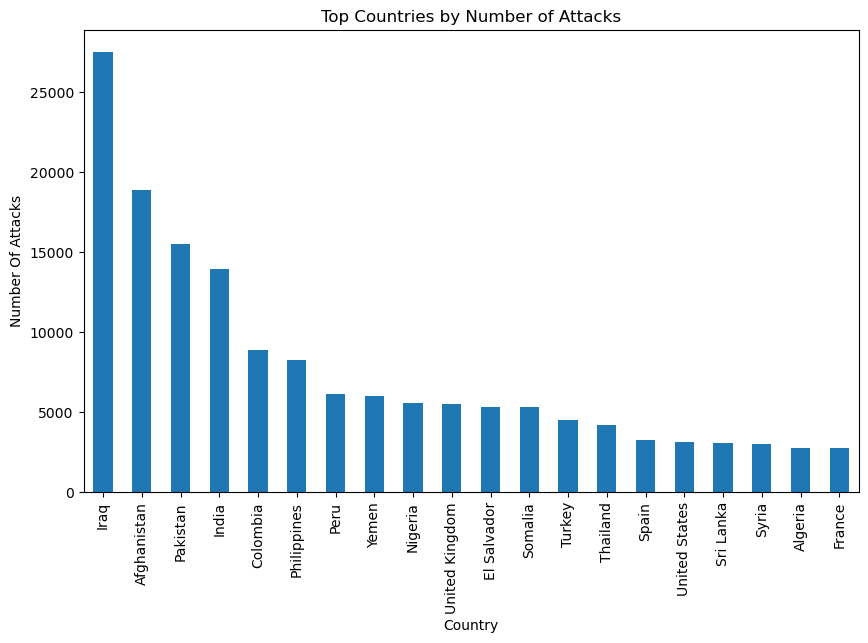

In [74]:
# Value Count for Top Country/attacks

country_counts = cleaned_terrorism_df['country_txt'].value_counts()
top_countries = country_counts.head(20)

plt.figure(figsize=(10,6))
top_countries.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number Of Attacks')
plt.title('Top Countries by Number of Attacks')
plt.show()

In [75]:
"""
Attack Types: Investigate the different types of terrorist attacks (e.g., bombings, assassinations) and their frequency. 
You could also analyze the lethality of different attack types.
"""

'\nAttack Types: Investigate the different types of terrorist attacks (e.g., bombings, assassinations) and their frequency. \nYou could also analyze the lethality of different attack types.\n'

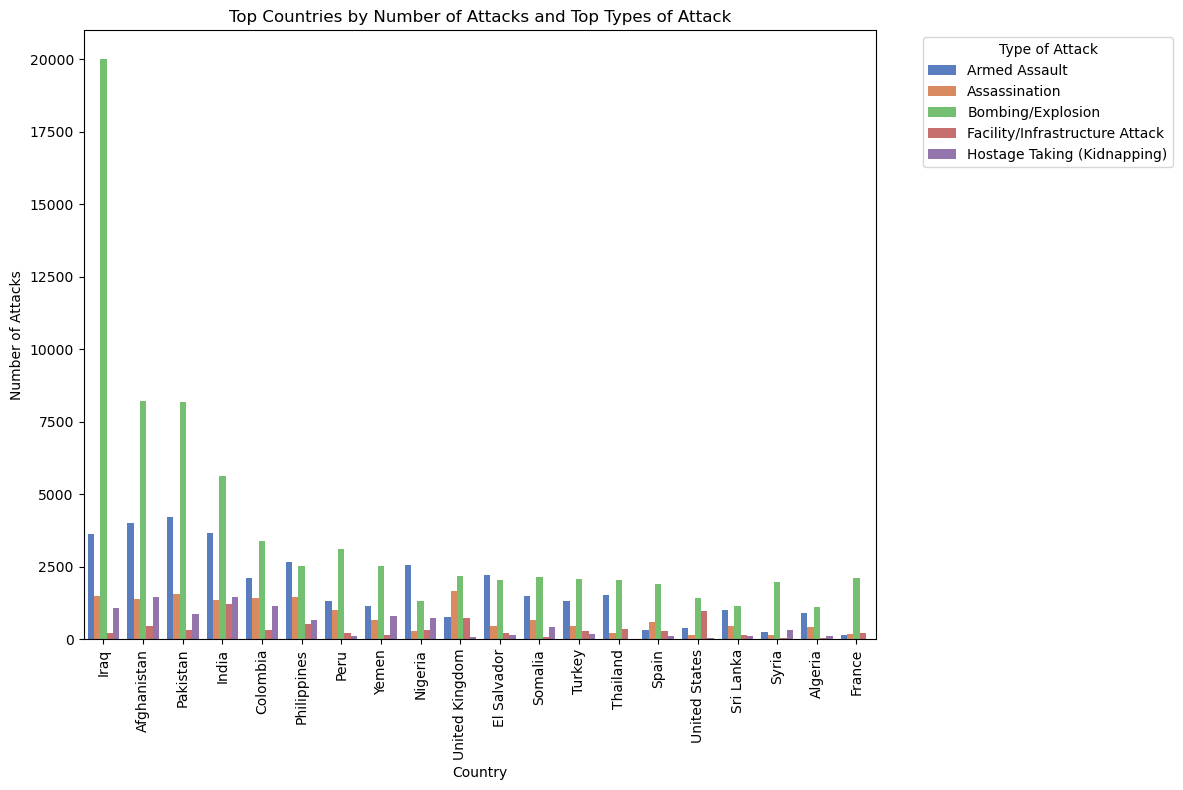

In [142]:
# Value Counts for Top Type of Attack/Country

# Count the occurrences of each type of attack
attack_counts = cleaned_terrorism_df['attacktype1_txt'].value_counts()

# Select only the top N types of attacks
top_attack_types = attack_counts.head(5)  # Adjust the number of types as needed

# Filter the data to include only the top types of attacks
filtered_df = cleaned_terrorism_df[cleaned_terrorism_df['attacktype1_txt'].isin(top_attack_types.index)]

# Group the filtered data by country and type of attack, then count the occurrences
country_attack_counts = filtered_df.groupby(['country_txt', 'attacktype1_txt']).size().unstack(fill_value=0)

# Select only the top N countries with the highest number of attacks
top_countries = cleaned_terrorism_df['country_txt'].value_counts().head(20)

# Filter the country_attack_counts DataFrame to include only the top countries
country_attack_counts = country_attack_counts.loc[top_countries.index]

# Reshape the data into long format for Seaborn
country_attack_counts = country_attack_counts.reset_index().melt(id_vars='country_txt', var_name='Type of Attack', value_name='Number of Attacks')

# Plotting the grouped bar plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=country_attack_counts, x='country_txt', y='Number of Attacks', hue='Type of Attack', palette='muted')
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.title('Top Countries by Number of Attacks and Top Types of Attack')
plt.legend(title='Type of Attack', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [77]:
"""Temporal Trends: 
Analyze the frequency of terrorist incidents over time (yearly, monthly) to identify any trends or patterns. 
You could visualize this using line plots or bar charts.
"""

'Temporal Trends: \nAnalyze the frequency of terrorist incidents over time (yearly, monthly) to identify any trends or patterns. \nYou could visualize this using line plots or bar charts.\n'

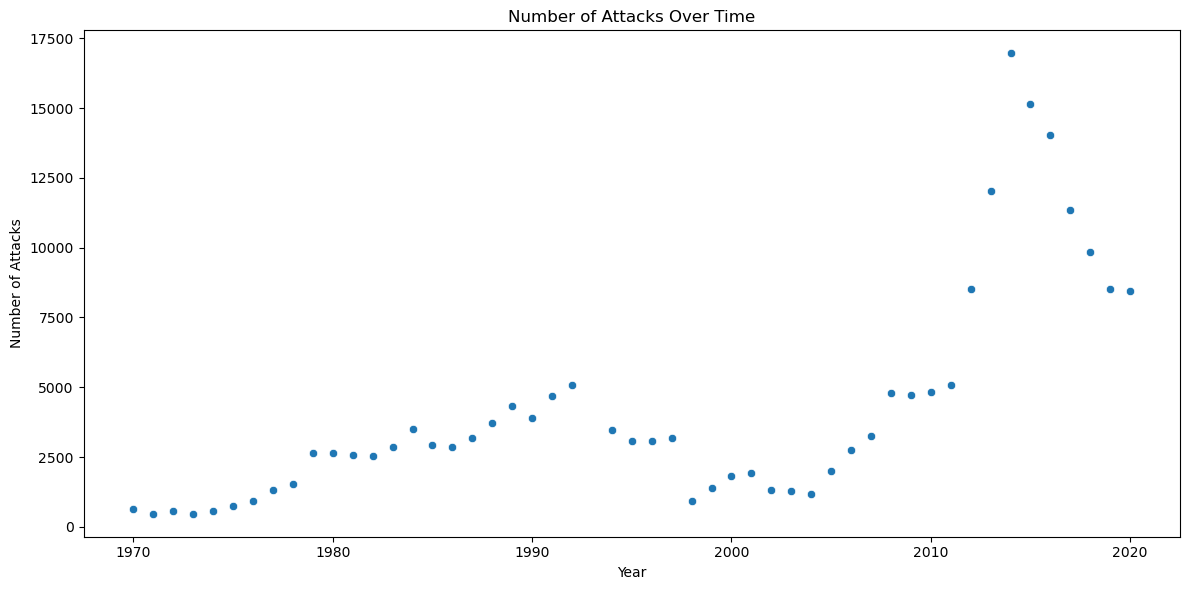

In [141]:
# Number of attacks over the years

cleaned_terrorism_df['iyear'] = pd.to_datetime(cleaned_terrorism_df['iyear'], format='%Y')


# Group the data by year and count the number of attacks in each year
attacks_over_time = cleaned_terrorism_df['iyear'].dt.year.value_counts().sort_index()


#Plotting the number of attacks over time using Seaborn
plt.figure(figsize=(12, 6))
sns.scatterplot(x=attacks_over_time.index, y=attacks_over_time.values)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Number of Attacks Over Time')
plt.tight_layout()
plt.show()

In [79]:
"""
Correlation Analysis: Explore potential correlations between different variables, 
such as attack type and success
"""

'\nCorrelation Analysis: Explore potential correlations between different variables, \nsuch as attack type and success\n'

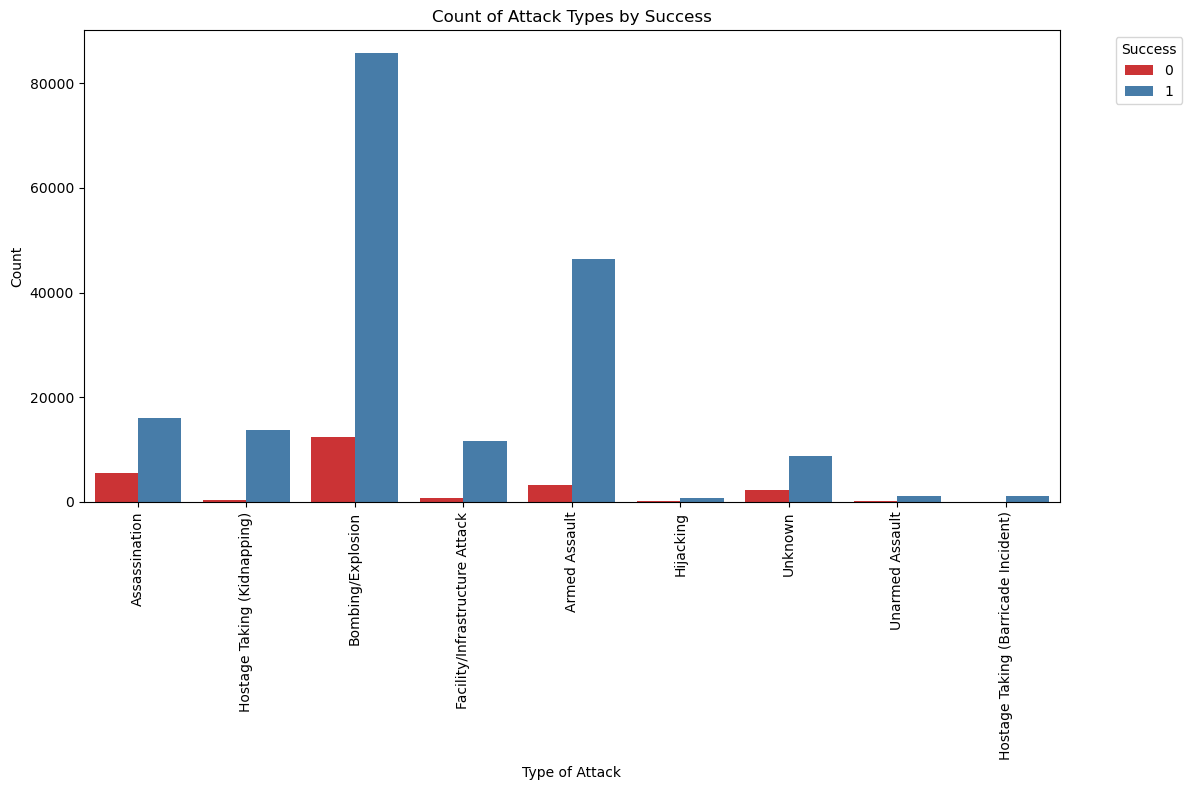

In [140]:
# Number of Attacks by succsess

plt.figure(figsize=(12, 8))
sns.countplot(data=cleaned_terrorism_df, x='attacktype1_txt', hue='success', palette='Set1')
plt.xlabel('Type of Attack')
plt.ylabel('Count')
plt.title('Count of Attack Types by Success')
plt.legend(title='Success', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

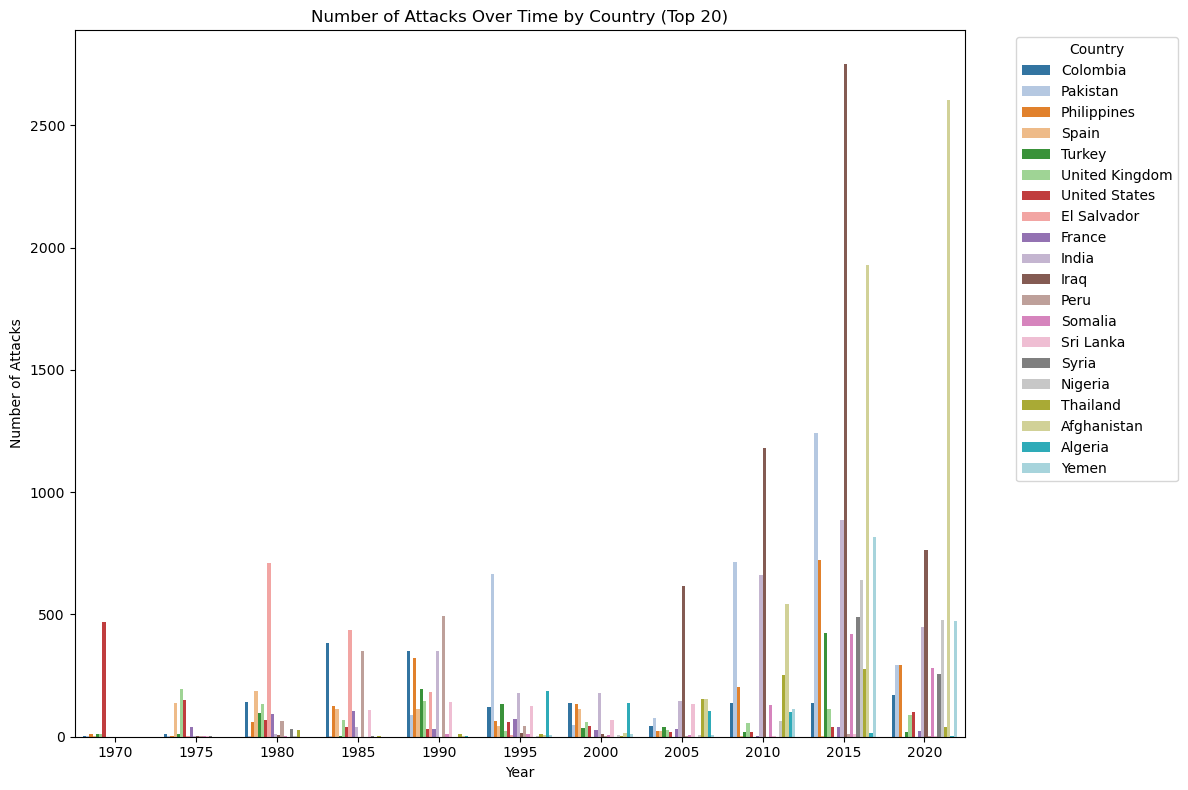

In [139]:
# # Top 20 Countries Number of Attacks Over Time

# Convert 'iyear' to datetime
cleaned_terrorism_df['iyear'] = pd.to_datetime(cleaned_terrorism_df['iyear'], format='%Y')

# Extract year from 'iyear' column
cleaned_terrorism_df['year'] = cleaned_terrorism_df['iyear'].dt.year

# Group by year and country, and count the number of attacks
attacks_over_time_by_country = cleaned_terrorism_df.groupby(['year', 'country_txt']).size().reset_index(name='num_attacks')

# Select the top 20 countries
top_countries = cleaned_terrorism_df['country_txt'].value_counts().head(20).index
attacks_over_time_by_country = attacks_over_time_by_country[attacks_over_time_by_country['country_txt'].isin(top_countries)]

# Filter every other year
attacks_over_time_by_country = attacks_over_time_by_country[attacks_over_time_by_country['year'] % 5 == 0]

# Plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=attacks_over_time_by_country, x='year', y='num_attacks', hue='country_txt', palette='tab20')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Number of Attacks Over Time by Country (Top 20)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

                region_txt                      attacktype1_txt  attack_count
0    Australasia & Oceania                        Armed Assault            56
1    Australasia & Oceania                        Assassination            36
2    Australasia & Oceania                    Bombing/Explosion            74
3    Australasia & Oceania       Facility/Infrastructure Attack           111
4    Australasia & Oceania                            Hijacking             3
..                     ...                                  ...           ...
103         Western Europe                            Hijacking            76
104         Western Europe  Hostage Taking (Barricade Incident)            98
105         Western Europe          Hostage Taking (Kidnapping)           274
106         Western Europe                      Unarmed Assault           174
107         Western Europe                              Unknown           271

[108 rows x 3 columns]


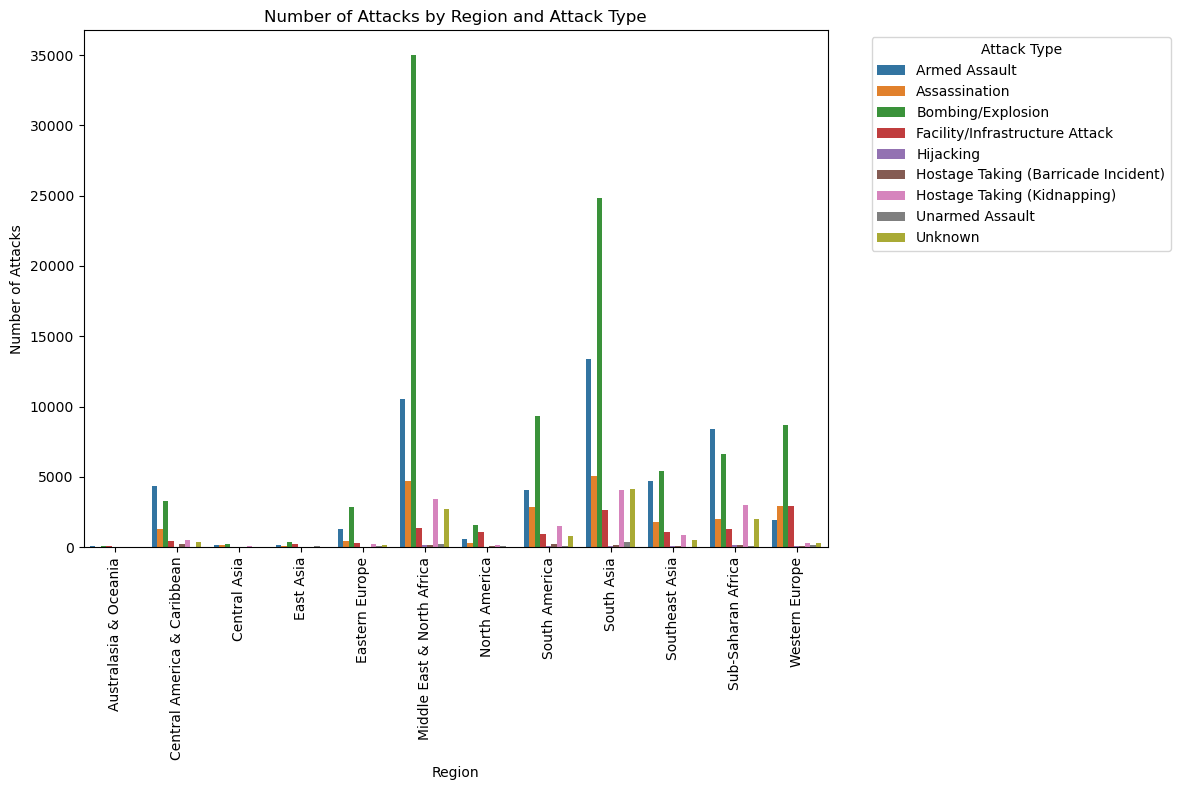

In [145]:
# Number of Attacks by region and type

# Group by region and attack type, and count the number of attacks
attacks_by_region_type = cleaned_terrorism_df.groupby(['region_txt', 'attacktype1_txt']).size().reset_index(name='attack_count')

# Print the resulting DataFrame
print(attacks_by_region_type)

# Plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=attacks_by_region_type, x='region_txt', y='attack_count', hue='attacktype1_txt', palette='tab10')
plt.xlabel('Region')
plt.ylabel('Number of Attacks')
plt.title('Number of Attacks by Region and Attack Type')
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [130]:
attacks_by_region_type[attacks_by_region_type['region_txt'] == 'Eastern Europe']

,region_txt,attacktype1_txt,attack_count
36,Eastern Europe,Armed Assault,1309
37,Eastern Europe,Assassination,418
38,Eastern Europe,Bombing/Explosion,2826
39,Eastern Europe,Facility/Infrastructure Attack,303
40,Eastern Europe,Hijacking,27
41,Eastern Europe,Hostage Taking (Barricade Incident),21
42,Eastern Europe,Hostage Taking (Kidnapping),226
43,Eastern Europe,Unarmed Assault,79
44,Eastern Europe,Unknown,117


In [132]:
attacks_by_region_type['attack_count'].value_counts()

attack_count
3       2
6       2
56      1
1513    1
4142    1
       ..
22      1
47      1
15      1
18      1
271     1
Name: count, Length: 106, dtype: int64

In [134]:
attacks_by_region_type.groupby('region_txt').sum()

,attacktype1_txt,attack_count
region_txt,,
Australasia & Oceania,Armed AssaultAssassinationBombing/ExplosionFac...,325
Central America & Caribbean,Armed AssaultAssassinationBombing/ExplosionFac...,10386
Central Asia,Armed AssaultAssassinationBombing/ExplosionFac...,580
East Asia,Armed AssaultAssassinationBombing/ExplosionFac...,847
Eastern Europe,Armed AssaultAssassinationBombing/ExplosionFac...,5326
Middle East & North Africa,Armed AssaultAssassinationBombing/ExplosionFac...,58252
North America,Armed AssaultAssassinationBombing/ExplosionFac...,3847
South America,Armed AssaultAssassinationBombing/ExplosionFac...,19846
South Asia,Armed AssaultAssassinationBombing/ExplosionFac...,54725
